In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('gender_classification_v7.csv')

In [98]:
# this is code for making dictionary that has possiblity of multiple features
binary_possibilty = {}
for long_hair in [0, 1]:
    nose_wide_dict = {}
    long_hair_df = df.loc[df['long_hair'] == long_hair]

    for nose_wide in [0, 1]:
        nose_long_dict = {}
        nose_wide_df = long_hair_df.loc[long_hair_df['nose_wide'] == nose_wide]

        for nose_long in [0, 1]:

            lips_thin_dict = {}
            nose_long_df = nose_wide_df.loc[nose_wide_df['nose_long'] == nose_long]
            for lips_thin in [0, 1]:

                distance_dict = {}
                lips_thin_df = nose_long_df.loc[nose_long_df['lips_thin'] == lips_thin]
                for distance in [0, 1]:
                    
                    try:
                        male = len(lips_thin_df.loc[lips_thin_df['distance'] == distance].groupby('gender').get_group('Male').index)
                    except KeyError:
                        male = 0
                    try:
                        female = len(lips_thin_df.loc[lips_thin_df['distance'] == distance].groupby('gender').get_group('Female').index)
                    except KeyError:
                        female = 0
                    try:
                        distance_dict[f'distance_nose_to_lip_long_{distance}'] = f'Male = {male/(male+female)*100:.2f}% Female = {female/(male+female)*100:.2f}%'
                    except ZeroDivisionError:
                        distance_dict[f'distance_nose_to_lip_long_{distance}'] = 'NA'

                lips_thin_dict[f'lips_thin_{lips_thin}'] = distance_dict

            nose_long_dict[f'nose_long_{nose_long}'] = lips_thin_dict

        nose_wide_dict[f'nose_wide_{nose_wide}'] = nose_long_dict

    male = len(long_hair_df.groupby('gender').get_group('Male').index)
    female = len(long_hair_df.groupby('gender').get_group('Female').index)
    nose_wide_dict[f'nose_wide_x'] = f'Male = {male/(male+female)*100:.2f}% Female = {female/(male+female)*100:.2f}%'
    binary_possibilty[f'long_hair_{long_hair}'] = nose_wide_dict

binary_possibilty is a dictionary that contains posibility of combined 5 binary features: 'long_hair', 'nose_wide', 'nose_long', 'lips_thin', and 'distance_nose_to_lip_long'. Each feature has 2 posibility: 0 or 1. So there are 120 possible combinations. The way to use the dictionary is to use feature's name with value as the key. For example, long_hair is 0 use 'long_hair_0'. 
To find possibility for particular case, use 

In [97]:
# All dictionary
binary_possibilty

{'long_hair_0': {'nose_wide_0': {'nose_long_0': {'lips_thin_0': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'},
    'lips_thin_1': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'}},
   'nose_long_1': {'lips_thin_0': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'},
    'lips_thin_1': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'}}},
  'nose_wide_1': {'nose_long_0': {'lips_thin_0': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'},
    'lips_thin_1': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'}},
   'nose_long_1': {'lips_thin_0': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'},
    'lips_thin_1': {'distance_nose_to_lip_long_0': 'NA',
     'distance_nose_to_lip_long_1': 'NA'}}},
  'nose_wide_x': 'Male = 51.38% Female = 48.62%'},
 'long_hair_1': {'nose_wide_0': {'nose

In [103]:
single_feature_possibility = {}
binary_feature = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for feature in binary_feature:
    for value in [0, 1]:
        male = len(df.loc[df[feature] == value].groupby('gender').get_group('Male').index)
        female = len(df.loc[df[feature] == value].groupby('gender').get_group('Female').index)
        single_feature_possibility[f'{feature}_{value}'] = f'Male = {male/(male+female)*100:.2f}% Female = {female/(male+female)*100:.2f}%'


In [104]:
single_feature_possibility

{'long_hair_0': 'Male = 51.38% Female = 48.62%',
 'long_hair_1': 'Male = 49.78% Female = 50.22%',
 'nose_wide_0': 'Male = 12.52% Female = 87.48%',
 'nose_wide_1': 'Male = 88.38% Female = 11.62%',
 'nose_long_0': 'Male = 12.19% Female = 87.81%',
 'nose_long_1': 'Male = 86.61% Female = 13.39%',
 'lips_thin_0': 'Male = 13.33% Female = 86.67%',
 'lips_thin_1': 'Male = 87.67% Female = 12.33%',
 'distance_nose_to_lip_long_0': 'Male = 12.33% Female = 87.67%',
 'distance_nose_to_lip_long_1': 'Male = 87.82% Female = 12.18%'}

In [139]:
numerical_feature = {}

In [145]:
for_plot = []
for cm in np.arange(df['forehead_width_cm'].min(), df['forehead_width_cm'].max(), step=0.2):
    try:
        male = len( df.loc[(cm < df['forehead_width_cm']) & (df['forehead_width_cm'] < cm+0.2)].groupby('gender').get_group('Male').index)
    except KeyError:
        male = 0
    try:
        female = len( df.loc[(cm < df['forehead_width_cm']) & (df['forehead_width_cm'] < cm+0.2)].groupby('gender').get_group('Female').index)
    except KeyError:
        female = 0
    for_plot.append({
        'cm': cm,
        'percent_male': male/(male+female)*100
    })
    numerical_feature[f'forehead_width_{cm:.1f}-{cm+0.2:.1f}cm'] = f'Male = {male/(male+female)*100:.2f}% Female = {female/(male+female)*100:.2f}%'

In [146]:
numerical_feature

{'forehead_width_11.4-11.6cm': 'Male = 35.06% Female = 64.94%',
 'forehead_width_11.6-11.8cm': 'Male = 29.32% Female = 70.68%',
 'forehead_width_11.8-12.0cm': 'Male = 41.80% Female = 58.20%',
 'forehead_width_12.0-12.2cm': 'Male = 42.49% Female = 57.51%',
 'forehead_width_12.2-12.4cm': 'Male = 37.46% Female = 62.54%',
 'forehead_width_12.4-12.6cm': 'Male = 45.90% Female = 54.10%',
 'forehead_width_12.6-12.8cm': 'Male = 44.73% Female = 55.27%',
 'forehead_width_12.8-13.0cm': 'Male = 37.28% Female = 62.72%',
 'forehead_width_13.0-13.2cm': 'Male = 41.79% Female = 58.21%',
 'forehead_width_13.2-13.4cm': 'Male = 47.60% Female = 52.40%',
 'forehead_width_13.4-13.6cm': 'Male = 37.00% Female = 63.00%',
 'forehead_width_13.6-13.8cm': 'Male = 43.53% Female = 56.47%',
 'forehead_width_13.8-14.0cm': 'Male = 42.64% Female = 57.36%',
 'forehead_width_14.0-14.2cm': 'Male = 41.10% Female = 58.90%',
 'forehead_width_14.2-14.4cm': 'Male = 48.29% Female = 51.71%',
 'forehead_width_14.4-14.6cm': 'Male = 1

C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'Forehead Width (cm)')

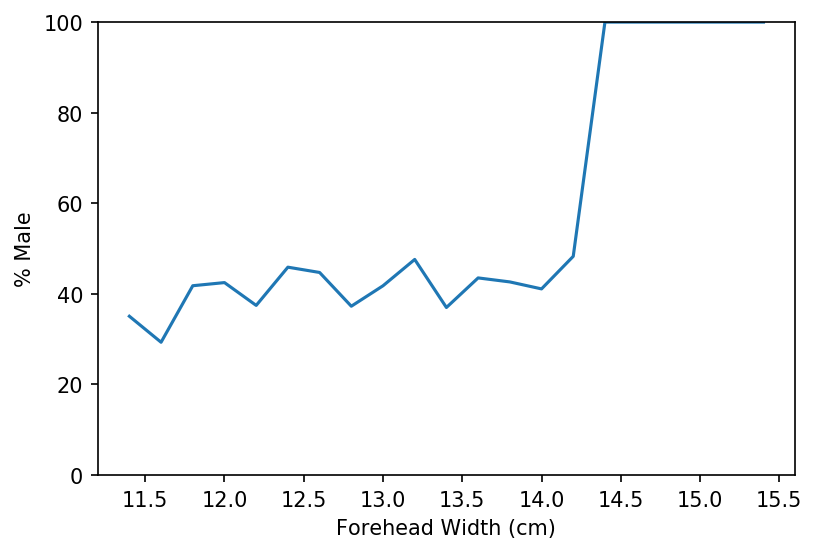

In [153]:
fig, ax = plt.subplots(dpi=150)
temp_df = pd.DataFrame(for_plot)
ax.plot(temp_df['cm'], temp_df['percent_male'])
plt.ylim([0, 100])
ax.set_ylabel('% Male')
ax.set_xlabel('Forehead Width (cm)')

In [154]:
for_plot = []
for cm in np.arange(df['forehead_height_cm'].min(), df['forehead_height_cm'].max(), step=0.2):
    try:
        male = len( df.loc[(cm < df['forehead_height_cm']) & (df['forehead_height_cm'] < cm+0.2)].groupby('gender').get_group('Male').index)
    except KeyError:
        male = 0
    try:
        female = len( df.loc[(cm < df['forehead_height_cm']) & (df['forehead_height_cm'] < cm+0.2)].groupby('gender').get_group('Female').index)
    except KeyError:
        female = 0
    for_plot.append({
        'cm': cm,
        'percent_male': male/(male+female)*100
    })
    numerical_feature[f'forehead_height_{cm:.1f}-{cm+0.2:.1f}cm'] = f'Male = {male/(male+female)*100:.2f}% Female = {female/(male+female)*100:.2f}%'

In [155]:
numerical_feature

{'forehead_width_11.4-11.6cm': 'Male = 35.06% Female = 64.94%',
 'forehead_width_11.6-11.8cm': 'Male = 29.32% Female = 70.68%',
 'forehead_width_11.8-12.0cm': 'Male = 41.80% Female = 58.20%',
 'forehead_width_12.0-12.2cm': 'Male = 42.49% Female = 57.51%',
 'forehead_width_12.2-12.4cm': 'Male = 37.46% Female = 62.54%',
 'forehead_width_12.4-12.6cm': 'Male = 45.90% Female = 54.10%',
 'forehead_width_12.6-12.8cm': 'Male = 44.73% Female = 55.27%',
 'forehead_width_12.8-13.0cm': 'Male = 37.28% Female = 62.72%',
 'forehead_width_13.0-13.2cm': 'Male = 41.79% Female = 58.21%',
 'forehead_width_13.2-13.4cm': 'Male = 47.60% Female = 52.40%',
 'forehead_width_13.4-13.6cm': 'Male = 37.00% Female = 63.00%',
 'forehead_width_13.6-13.8cm': 'Male = 43.53% Female = 56.47%',
 'forehead_width_13.8-14.0cm': 'Male = 42.64% Female = 57.36%',
 'forehead_width_14.0-14.2cm': 'Male = 41.10% Female = 58.90%',
 'forehead_width_14.2-14.4cm': 'Male = 48.29% Female = 51.71%',
 'forehead_width_14.4-14.6cm': 'Male = 1

C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abe107pheno\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'Forehead Height (cm)')

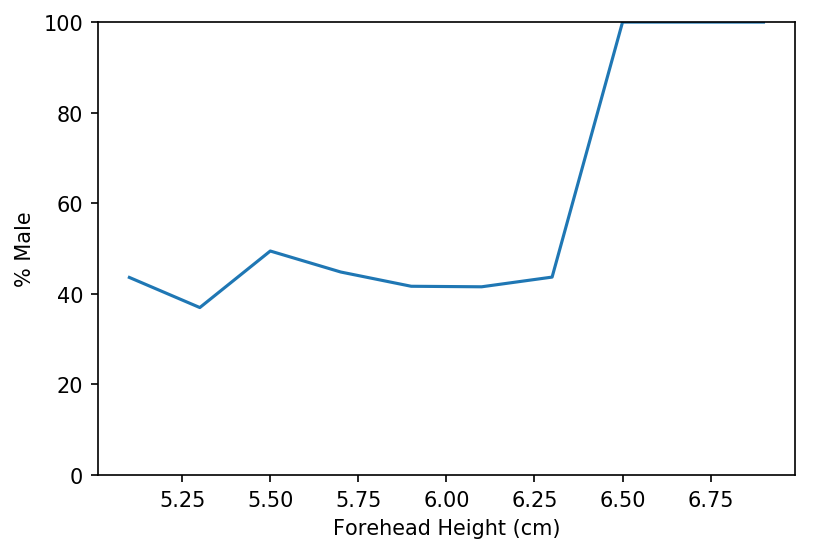

In [156]:
fig, ax = plt.subplots(dpi=150)
temp_df = pd.DataFrame(for_plot)
ax.plot(temp_df['cm'], temp_df['percent_male'])
plt.ylim([0, 100])
ax.set_ylabel('% Male')
ax.set_xlabel('Forehead Height (cm)')